In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed()

In [2]:
def initialize_action_value_function(number_of_actions: int) -> list:
    q_real = []
    for _ in range(k):
        q_real.append(random.randint(0, k))
    return q_real


def get_action_reward(
        q_real_action: int, divergence: float) -> float:
    return float(q_real_action) + (random.random() * 2 * divergence) - divergence
   

def get_greedy_action(Q: list) -> int:
    greedy_actions = [np.argmax(Q)]
    last_index = greedy_actions[-1]
    if last_index != len(Q) - 1:
        next_max = last_index + np.argmax(Q[last_index + 1:]) + 1
        while Q[last_index] == Q[next_max]:
            greedy_actions.append(next_max)
            last_index = greedy_actions[-1]
            if last_index == len(Q) - 1:
                break
            next_max = last_index + np.argmax(Q[last_index + 1:]) + 1
    choosen_action = random.choice(greedy_actions)
    return choosen_action  


def get_solution_stats(Q: list, q_real: list, cumulative_reward: float, iteration_no: int=100) -> tuple:
    mse = ((np.array(q_real) - np.array(Q)) ** 2).mean(axis=0)
    average_reward = cumulative_reward / iteration_no / np.max(q_real)
    return mse, average_reward


def stationary_k_arm_bandit(k: int, q_real: list, iteration_no: int=100, epsilon: float=0.1, divergence: float=1.0):
    performance_mse = []
    performance_average_reward = []
    Q = [0] * k
    N = [0] * k
    cumulative_reward = 0
    for i in range(iteration_no):
        probability = random.random()
        if probability > epsilon:
            action = get_greedy_action(Q)
        else:
            action = random.randint(0, k - 1)

        reward = get_action_reward(q_real[action], divergence)
        cumulative_reward += reward
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        
        mse, average_reward = get_solution_stats(Q, q_real, cumulative_reward, iteration_no=(i + 1))
        performance_mse.append(mse)
        performance_average_reward.append(average_reward)
    return performance_mse, performance_average_reward
        

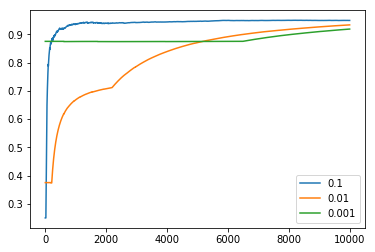

0.94905 0.933325 0.9185375


In [3]:
k = 10            # arms number
iter_no = 10000
q_real = initialize_action_value_function(k)
performance_mse_0_1, performance_average_reward_0_1 = stationary_k_arm_bandit(k, q_real, iteration_no=iter_no, epsilon=0.1, divergence=0)
performance_mse_0_01, performance_average_reward_0_01 = stationary_k_arm_bandit(k, q_real, iteration_no=iter_no, epsilon=0.01, divergence=0)
performance_mse_0_001, performance_average_reward_0_001 = stationary_k_arm_bandit(k, q_real, iteration_no=iter_no, epsilon=0.001, divergence=0)
plt.plot(range(iter_no), performance_average_reward_0_1, range(iter_no), performance_average_reward_0_01, range(iter_no), performance_average_reward_0_001)
plt.legend(('0.1', '0.01', '0.001'))

plt.show()
print(performance_average_reward_0_1[-1], performance_average_reward_0_01[-1], performance_average_reward_0_001[-1])